In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns 
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# from sklearn.datasets import  load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [30]:
df = pd.read_csv("EURUSD.csv", parse_dates=[0], index_col=0)
df = df.Close.to_frame()

In [31]:
df["Return"] =  np.log(df.Close.div(df.Close.shift(1)))
# df = df.loc["2010":, :]#.Return.plot()
df

,Close,Return
Date,,
2003-12-01,1.196501,NaN
2003-12-02,1.208897,0.010307
2003-12-03,1.212298,0.002809
2003-12-04,1.208094,-0.003473
2003-12-05,1.218695,0.008736
...,...,...
2024-10-03,1.104850,-0.001393
2024-10-04,1.103558,-0.001170
2024-10-07,1.097454,-0.005546


In [32]:
df["lag_1"] = df.Return.shift(1)

In [33]:
df.head(4)

,Close,Return,lag_1
Date,,,
2003-12-01,1.196501,NaN,NaN
2003-12-02,1.208897,0.010307,NaN
2003-12-03,1.212298,0.002809,0.010307
2003-12-04,1.208094,-0.003473,0.002809


In [34]:
df.dropna(inplace=True)
x= df.drop("Return",axis=1)
y = df.Return.to_frame()

In [35]:
y.head(2)

,Return
Date,
2003-12-03,0.002809
2003-12-04,-0.003473


In [36]:
model  = LinearRegression()
model.fit(x,y)

LinearRegression()

In [37]:
pred = model.predict(x)

In [38]:
# df["pred"] = np.sign(pred) 
df["pred"] = pred 
df

,Close,Return,lag_1,pred
Date,,,,
2003-12-03,1.212298,0.002809,0.010307,-0.001947
2003-12-04,1.208094,-0.003473,0.002809,-0.000588
2003-12-05,1.218695,0.008736,-0.003473,0.000584
2003-12-08,1.222001,0.002709,0.008736,-0.001638
2003-12-09,1.224995,0.002447,0.002709,-0.000530
...,...,...,...,...
2024-10-03,1.104850,-0.001393,-0.006549,0.000881
2024-10-04,1.103558,-0.001170,-0.001393,-0.000064
2024-10-07,1.097454,-0.005546,-0.001170,-0.000119


<Axes: xlabel='Date'>

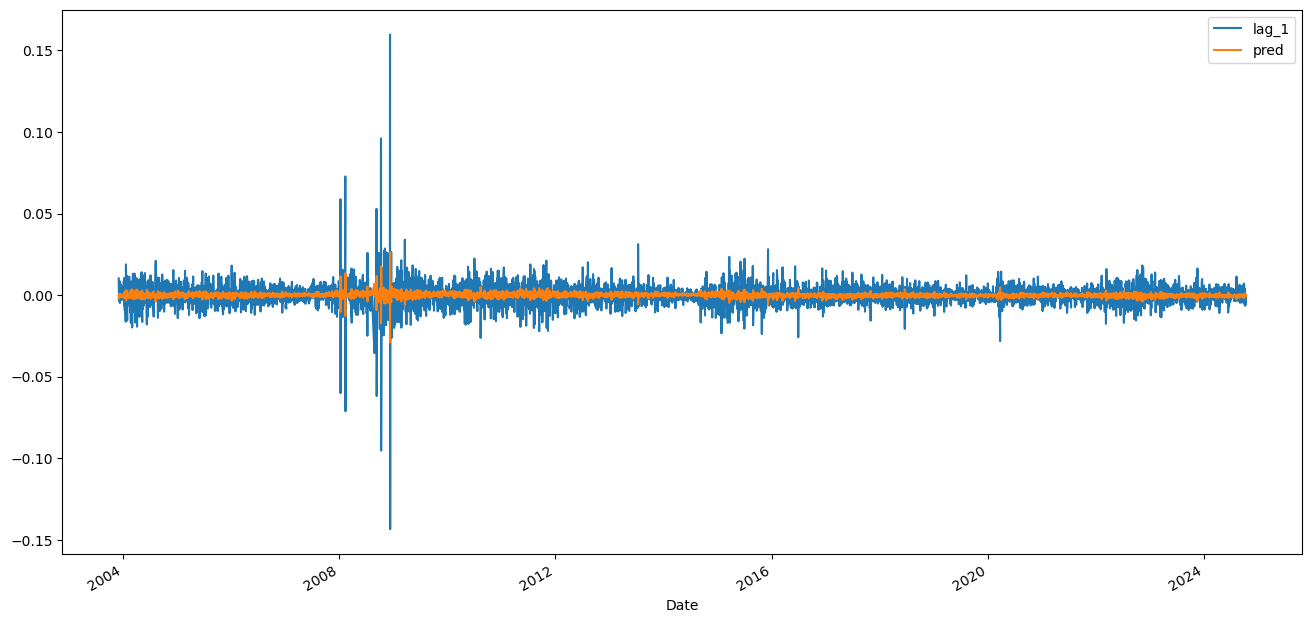

In [39]:
df.loc[:,["lag_1","pred"]].plot(figsize=(16,8))

In [40]:
df.pred = np.sign(df.pred)

In [41]:
hit = np.sign(df.Return*df.pred).value_counts()
hit

 1.0    2807
-1.0    2580
 0.0      25
Name: count, dtype: int64

In [42]:
hit[1] / sum(hit)

0.5186622320768662

In [72]:
# df["return_sign"] = np.sign(df.Return)

#  Multi regression

In [3]:
df = pd.read_csv("EURUSD.csv", parse_dates=[0], index_col=0)
df = df.Close.to_frame()

In [4]:
df["Return"] = np.log(df.Close.div(df.Close.shift(1)))
# df["Return"] = df.Close.div(df.Close.shift(1))

In [6]:
for i in range(1,6):
    col = f"lag{i}"
    df[col] = df.Return.shift(i)
    

In [7]:
df.dropna(inplace=True)
x= df.drop("Return",axis=1)
y = df.Return.to_frame()

In [8]:
model  = LinearRegression()
model.fit(x,y)

LinearRegression()

In [9]:
pred = model.predict(x)

In [10]:
df["pred"] = np.sign(pred)
df

,Close,Return,lag1,lag2,lag3,lag4,lag5,pred
Date,,,,,,,,
2003-12-09,1.224995,0.002447,0.002709,0.008736,-0.003473,0.002809,0.010307,-1.0
2003-12-10,1.219096,-0.004827,0.002447,0.002709,0.008736,-0.003473,0.002809,-1.0
2003-12-11,1.222404,0.002710,-0.004827,0.002447,0.002709,0.008736,-0.003473,1.0
2003-12-12,1.227898,0.004484,0.002710,-0.004827,0.002447,0.002709,0.008736,-1.0
2003-12-15,1.231997,0.003333,0.004484,0.002710,-0.004827,0.002447,0.002709,-1.0
...,...,...,...,...,...,...,...,...
2024-10-03,1.104850,-0.001393,-0.006549,-0.002978,-0.000659,0.004138,-0.005391,1.0
2024-10-04,1.103558,-0.001170,-0.001393,-0.006549,-0.002978,-0.000659,0.004138,1.0
2024-10-07,1.097454,-0.005546,-0.001170,-0.001393,-0.006549,-0.002978,-0.000659,1.0


In [11]:
hit = np.sign(df.Return*df.pred).value_counts()
hit 

 1.0    2817
-1.0    2566
 0.0      25
Name: count, dtype: int64

In [15]:
hit_ratio = hit[1] / sum(hit)
hit_ratio

0.5208949704142012

In [12]:
df["pred"].value_counts()

pred
-1.0    2809
 1.0    2599
Name: count, dtype: int64

In [13]:
r2_score(np.sign(df.Return),df.pred)

-0.9113956466772877